# Perform exploratory data analysis (EDA)


In [1]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

In [8]:
# Open dataset
df_initial = pd.read_csv('./Loan_Default.csv')

df_initial.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [11]:
# Open dataset
df_initial.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [7]:
df_initial.shape

(148670, 34)

In [10]:
# Open dataset
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# Handle missing values and perform any necessary data preprocessing.

<Axes: >

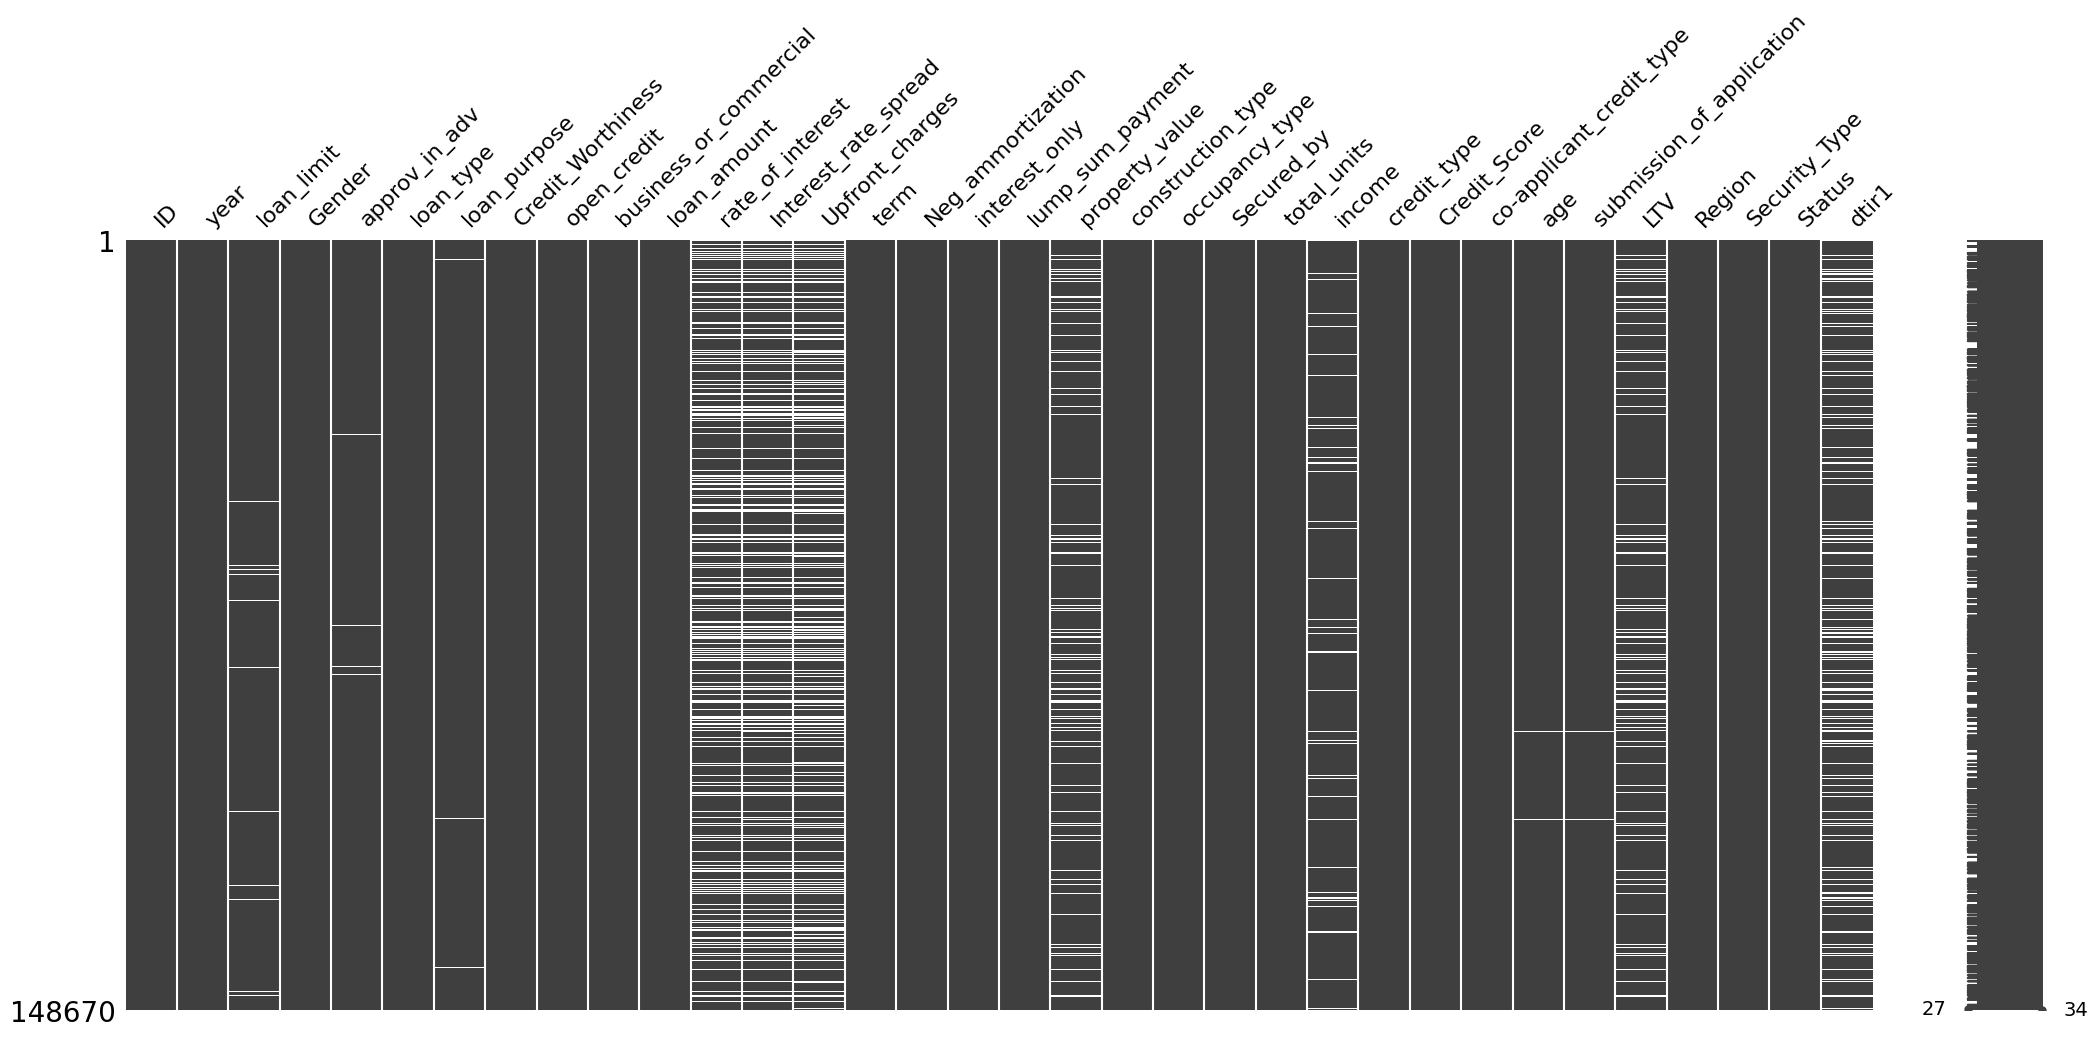

In [13]:
# Ploting missing data

msno.matrix(df_initial)

In [14]:
# Missing data
df_initial.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [15]:
# Missing values percent
def miss_val_summary(df):
    total = df.shape[0]
    miss_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    miss_percent = {}
    for col in miss_columns:
        null_count = df[col].isnull().sum()
        percent = (null_count/total) * 100
        miss_percent[col] = percent
        print("{} : {} ({}%)".format(col, null_count, round(percent, 3)))
    return miss_percent

In [17]:
miss_percent = miss_val_summary(df_initial)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


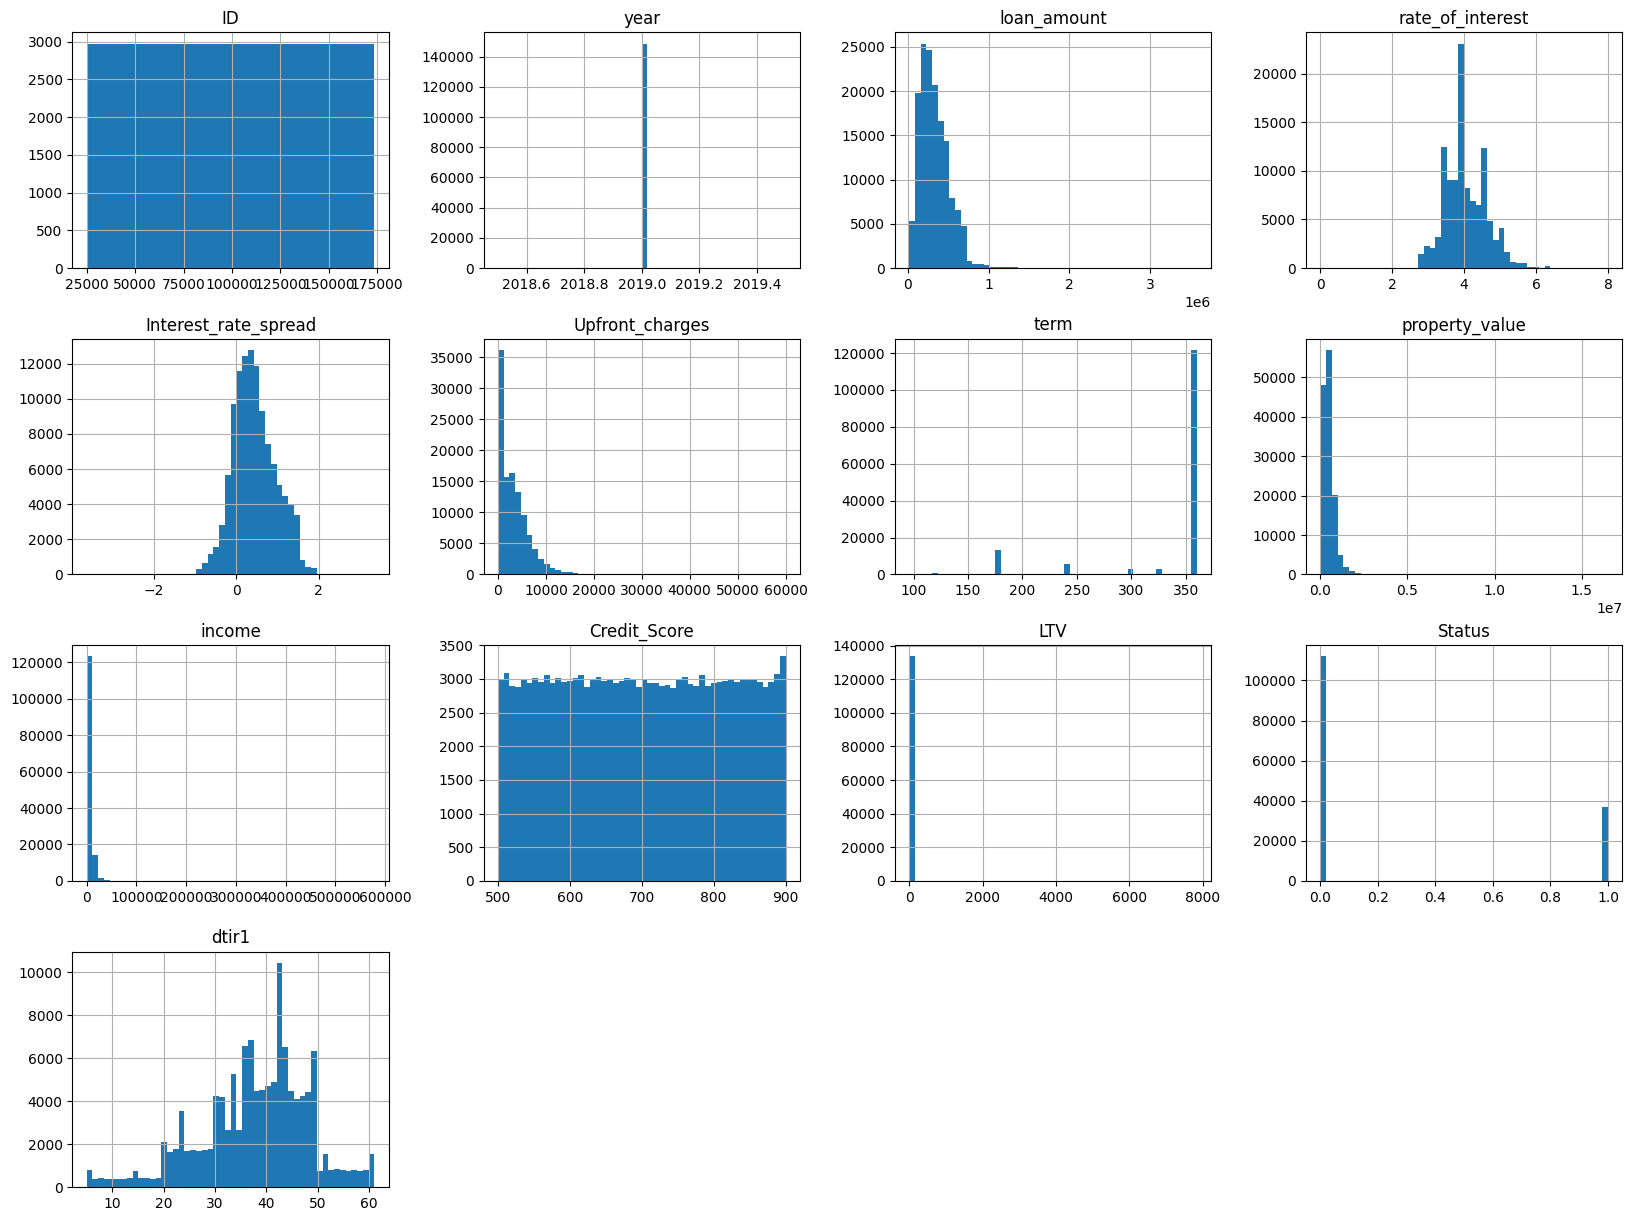

In [19]:
# Numerical data histogram
df_initial.hist(bins = 50, figsize = (20, 15))
plt.show()

In [21]:
# Only numerical features
df_num = df_initial.copy()
num_cols = [col for col in df_num.columns if df_num[col].dtype != 'object']
print(num_cols)
df_num = df_num[num_cols]
df_num.shape
df_num.head()

['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [24]:
# Numerical Features Correlations

corr_matrix = df_num.corr()
corr_matrix['Status'].sort_values(ascending = False)


Status                  1.000000
dtir1                   0.078083
LTV                     0.038895
rate_of_interest        0.022957
Credit_Score            0.004004
ID                      0.001703
term                   -0.000240
Upfront_charges        -0.019138
loan_amount            -0.036825
property_value         -0.048864
income                 -0.065119
year                         NaN
Interest_rate_spread         NaN
Name: Status, dtype: float64

In [25]:
df_num.head(10)

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,4.560,0.2000,595.00,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,4.250,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,4.000,0.3042,0.00,360.0,758000.0,10440.0,602,91.886544,0,39.0
5,24895,2019,706500,3.990,0.1523,370.00,360.0,1008000.0,10080.0,864,70.089286,0,40.0
6,24896,2019,346500,4.500,0.9998,5120.00,360.0,438000.0,5040.0,860,79.109589,0,44.0
7,24897,2019,266500,4.125,0.2975,5609.88,360.0,308000.0,3780.0,863,86.525974,0,42.0
8,24898,2019,376500,4.875,0.7395,1150.00,360.0,478000.0,5580.0,580,78.765690,0,44.0
9,24899,2019,436500,3.490,-0.2776,2316.50,360.0,688000.0,6720.0,788,63.444767,0,30.0


In [26]:
# Looking into the numerical features
df_num.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [27]:
# Looking into the numerical features with missing values
df_num.isnull().sum()

ID                          0
year                        0
loan_amount                 0
rate_of_interest        36439
Interest_rate_spread    36639
Upfront_charges         39642
term                       41
property_value          15098
income                   9150
Credit_Score                0
LTV                     15098
Status                      0
dtir1                   24121
dtype: int64

### Replacing numerical missing values using SimpleImputer

In [28]:
# Using the mean value to replace missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df_num)

In [30]:
pd_num_imputed = pd.DataFrame(X, columns = df_num.columns)
pd_num_imputed.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890.0,2019.0,116500.0,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,24891.0,2019.0,206500.0,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932
2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,24893.0,2019.0,456500.0,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000
4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000


In [31]:
pd_num_imputed.isnull().sum()

ID                      0
year                    0
loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
Status                  0
dtir1                   0
dtype: int64

In [34]:
# Only categorical variables

obj=[]
for i in df_initial.columns:
    if df_initial[i].dtype=='object':
        obj.append(i)
obj

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [37]:
# Categorical variables values

for i in range(len(obj)):
    print(obj[i],df_initial[obj[i]].unique())

loan_limit ['cf' nan 'ncf']
Gender ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv ['nopre' 'pre' nan]
loan_type ['type1' 'type2' 'type3']
loan_purpose ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness ['l1' 'l2']
open_credit ['nopc' 'opc']
business_or_commercial ['nob/c' 'b/c']
Neg_ammortization ['not_neg' 'neg_amm' nan]
interest_only ['not_int' 'int_only']
lump_sum_payment ['not_lpsm' 'lpsm']
construction_type ['sb' 'mh']
occupancy_type ['pr' 'sr' 'ir']
Secured_by ['home' 'land']
total_units ['1U' '2U' '3U' '4U']
credit_type ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ['CIB' 'EXP']
age ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application ['to_inst' 'not_inst' nan]
Region ['south' 'North' 'central' 'North-East']
Security_Type ['direct' 'Indriect']


In [39]:
# Looking into the categorical features with missing values
df_initial[obj].isnull().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
credit_type                     0
co-applicant_credit_type        0
age                           200
submission_of_application     200
Region                          0
Security_Type                   0
dtype: int64

In [41]:
df_cat = df_initial[obj]
df_cat.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [43]:
# status value count
df_initial['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [45]:
new_df = df_cat.join(pd_num_imputed)
new_df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct,24890.0,2019.0,116500.0,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct,24891.0,2019.0,206500.0,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct,24893.0,2019.0,456500.0,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000


In [46]:
new_df.isnull().sum()# removing the rows with missing categorical data
new_df = new_df.dropna()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
credit_type                     0
co-applicant_credit_type        0
age                           200
submission_of_application     200
Region                          0
Security_Type                   0
ID                              0
year                            0
loan_amount                     0
rate_of_interest                0
Interest_rate_spread            0
Upfront_charges                 0
term                            0
property_value                  0
income        

In [48]:
# removing the rows with missing categorical data
new_df = new_df.dropna()
new_df['Status'].value_counts()

Status
0.0    108713
1.0     35270
Name: count, dtype: int64

In [49]:
new_df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
ID                           0
year                         0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
property_value               0
income                       0
Credit_Score                 0
LTV                          0
Status  

In [51]:
# Only categorical variables

obj=[]
for i in new_df.columns:
    if df_initial[i].dtype=='object':
        obj.append(i)
obj

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [52]:
# Categorical variables values

for i in range(len(obj)):
    print(obj[i],new_df[obj[i]].unique())

loan_limit ['cf' 'ncf']
Gender ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv ['nopre' 'pre']
loan_type ['type1' 'type2' 'type3']
loan_purpose ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness ['l1' 'l2']
open_credit ['nopc' 'opc']
business_or_commercial ['nob/c' 'b/c']
Neg_ammortization ['not_neg' 'neg_amm']
interest_only ['not_int' 'int_only']
lump_sum_payment ['not_lpsm' 'lpsm']
construction_type ['sb' 'mh']
occupancy_type ['pr' 'sr' 'ir']
Secured_by ['home' 'land']
total_units ['1U' '2U' '3U' '4U']
credit_type ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ['CIB' 'EXP']
age ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
submission_of_application ['to_inst' 'not_inst']
Region ['south' 'North' 'central' 'North-East']
Security_Type ['direct' 'Indriect']


In [53]:
new_df_cat = new_df[obj]

In [54]:
new_df_cat.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [55]:
new_df_cat.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: int64

In [56]:
# Using get_dummies on categorical variables
new_df = pd.get_dummies(new_df, columns = new_df_cat.columns, dtype = float)
new_df

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,loan_limit_cf,loan_limit_ncf,Gender_Female,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_nopre,approv_in_adv_pre,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l1,Credit_Worthiness_l2,open_credit_nopc,open_credit_opc,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,interest_only_int_only,interest_only_not_int,lump_sum_payment_lpsm,lump_sum_payment_not_lpsm,construction_type_mh,construction_type_sb,occupancy_type_ir,occupancy_type_pr,occupancy_type_sr,Secured_by_home,Secured_by_land,total_units_1U,total_units_2U,total_units_3U,total_units_4U,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,24890.0,2019.0,116500.0,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,24891.0,2019.0,206500.0,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552.0,72.746457,1.0,37.732932,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,24893.0,2019.0,456500.0,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555.0,2019.0,436500.0,3.125000,0.257100,9960.000000,180.0,608000.000000,7860.0,659.0,71.792763,0.0,48.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
148666,173556.0,2019.0,586500.0,5.190000,0.854400,0.000000,360.0,788000.000000,7140.0,569.0,74.428934,0.0,15.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
148667,173557.0,2019.0,446500.0,3.125000,0.081600,1226.64

In [57]:
new_df.columns

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1', 'loan_limit_cf', 'loan_limit_ncf',
       'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_nopre', 'approv_in_adv_pre',
       'loan_type_type1', 'loan_type_type2', 'loan_type_type3',
       'loan_purpose_p1', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l1', 'Credit_Worthiness_l2',
       'open_credit_nopc', 'open_credit_opc', 'business_or_commercial_b/c',
       'business_or_commercial_nob/c', 'Neg_ammortization_neg_amm',
       'Neg_ammortization_not_neg', 'interest_only_int_only',
       'interest_only_not_int', 'lump_sum_payment_lpsm',
       'lump_sum_payment_not_lpsm', 'construction_type_mh',
       'construction_type_sb', 'occupancy_type_ir', 'occupancy_type_pr',
       'occupancy_type_sr', 'Secured_by_ho

In [58]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143983 entries, 0 to 148669
Data columns (total 72 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ID                                  143983 non-null  float64
 1   year                                143983 non-null  float64
 2   loan_amount                         143983 non-null  float64
 3   rate_of_interest                    143983 non-null  float64
 4   Interest_rate_spread                143983 non-null  float64
 5   Upfront_charges                     143983 non-null  float64
 6   term                                143983 non-null  float64
 7   property_value                      143983 non-null  float64
 8   income                              143983 non-null  float64
 9   Credit_Score                        143983 non-null  float64
 10  LTV                                 143983 non-null  float64
 11  Status                         

In [59]:
new_df = new_df.copy()
new_df = new_df.drop(['year', 'ID'], axis = 1)

# Train test split

In [60]:
### Split into training and validation set
from sklearn.model_selection import StratifiedKFold, train_test_split

y = new_df["Status"]

X = new_df.drop(["Status"], axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.20, shuffle = True, stratify = y, random_state = 0)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

## Decision Tree Classifier

In [86]:
### First model: Decision Tree
from sklearn.tree import DecisionTreeClassifier
### Model fit
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [87]:
### Model prediction
predict = tree.predict(val_X)
predict

array([0., 1., 0., ..., 0., 1., 0.])

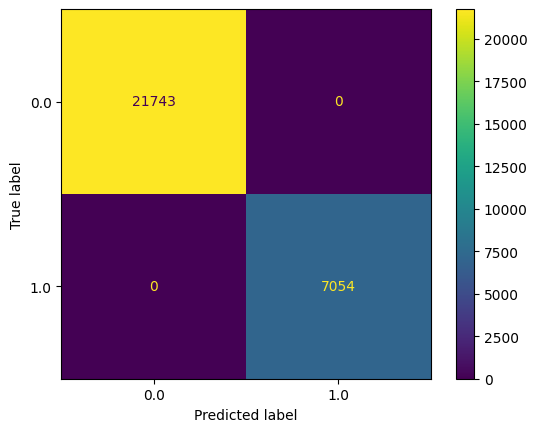

Model Metrics:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


In [88]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
conf_mat = confusion_matrix(val_y, predict)

# Decision Tree metrics
ConfusionMatrixDisplay.from_predictions(val_y, predict)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(val_y, predict))
print("Precision: ", precision_score(val_y, predict))
print("Recall: ", recall_score(val_y, predict))
print("F1 score: ", f1_score(val_y, predict))

## Random Forest Classifier

In [64]:
### Second model: Random Forest
from sklearn.ensemble import RandomForestClassifier
### Model fit
rf = RandomForestClassifier()
rf.fit(train_X, train_y)

RandomForestClassifier()

In [65]:
### Model prediction
predict_2 = rf.predict(val_X)
predict_2

array([0., 1., 0., ..., 0., 1., 0.])

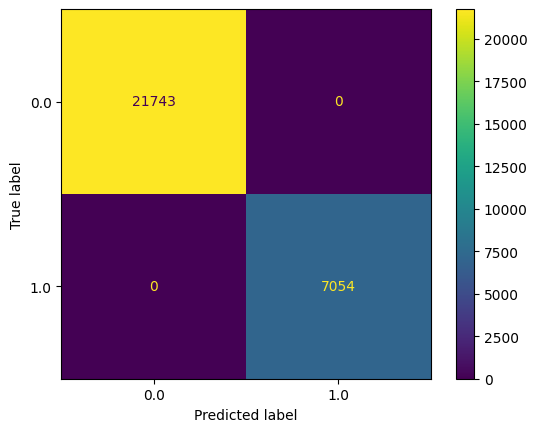

Model Metrics:
Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1 score: 1.00000


In [83]:
# Random Forest metrics
ConfusionMatrixDisplay.from_predictions(val_y, predict_2)
plt.show()
accuracy = accuracy_score(val_y, predict_2)
precision = precision_score(val_y, predict_2)
recall = recall_score(val_y, predict_2)
f1 = f1_score(val_y, predict_2)

print("Model Metrics:")
print("Accuracy: {:.5f}".format(accuracy))  
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1 score: {:.5f}".format(f1))

## Logistic Regression

In [67]:
# Third model:Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_X, train_y)

/Users/patteeralerdtada/Desktop/DataSci/ML-loan-classification-/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
### Model prediction
predict_3 = lr.predict(val_X)
predict_3

array([0., 0., 0., ..., 0., 0., 0.])

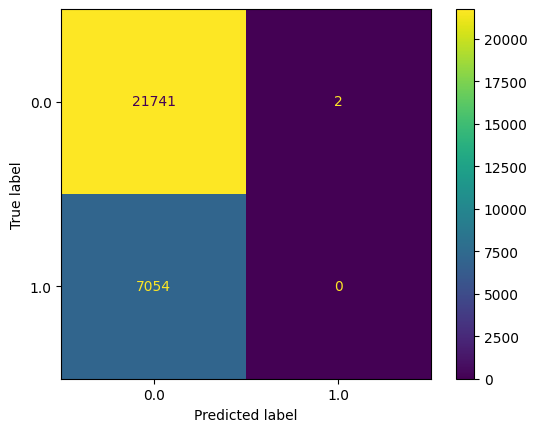

Model Metrics:
Accuracy:  0.7549744765079696
Precision:  0.0
Recall:  0.0
F1 score:  0.0


In [69]:
# Logistic Regression metrics
ConfusionMatrixDisplay.from_predictions(val_y, predict_3)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(val_y, predict_3))
print("Precision: ", precision_score(val_y, predict_3))
print("Recall: ", recall_score(val_y, predict_3))
print("F1 score: ", f1_score(val_y, predict_3))

## Neural Network Classifier

In [73]:
### Fourth model: Neural Networks
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=0)

nn.fit(train_X, train_y)

MLPClassifier(random_state=0)

In [74]:
### Model prediction
predict_4 = nn.predict(val_X)
predict_4

array([0., 0., 1., ..., 0., 1., 0.])

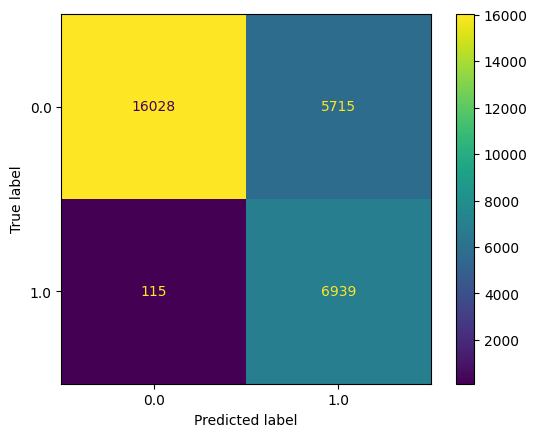

Model Metrics:
Accuracy:  0.7975483557314998
Precision:  0.5483641536273115
Recall:  0.9836971930819394
F1 score:  0.7041810432311751


In [75]:
# Neural networks metrics
ConfusionMatrixDisplay.from_predictions(val_y, predict_4)
plt.show()
print("Model Metrics:")
print("Accuracy: ", accuracy_score(val_y, predict_4))
print("Precision: ", precision_score(val_y, predict_4))
print("Recall: ", recall_score(val_y, predict_4))
print("F1 score: ", f1_score(val_y, predict_4))

## Scores Compilation and Summary result

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

trained_models = [tree, rf, lr, nn]
model_names = ["Decision Trees","RandomForest","Logistic Regression","Neurol Network"]
model_list = list(zip(model_names, trained_models))
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model_name, model in model_list:
    predict = model.predict(val_X)
    
    accuracy_scores.append(accuracy_score(val_y, predict))
    precision_scores.append(precision_score(val_y, predict))
    recall_scores.append(recall_score(val_y, predict))
    f1_scores.append(f1_score(val_y, predict))

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Trees,1.000000,1.000000,1.000000,1.000000
1,RandomForest,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression,0.754974,0.000000,0.000000,0.000000
3,Neurol Network,0.797548,0.548364,0.983697,0.704181
